## (a)

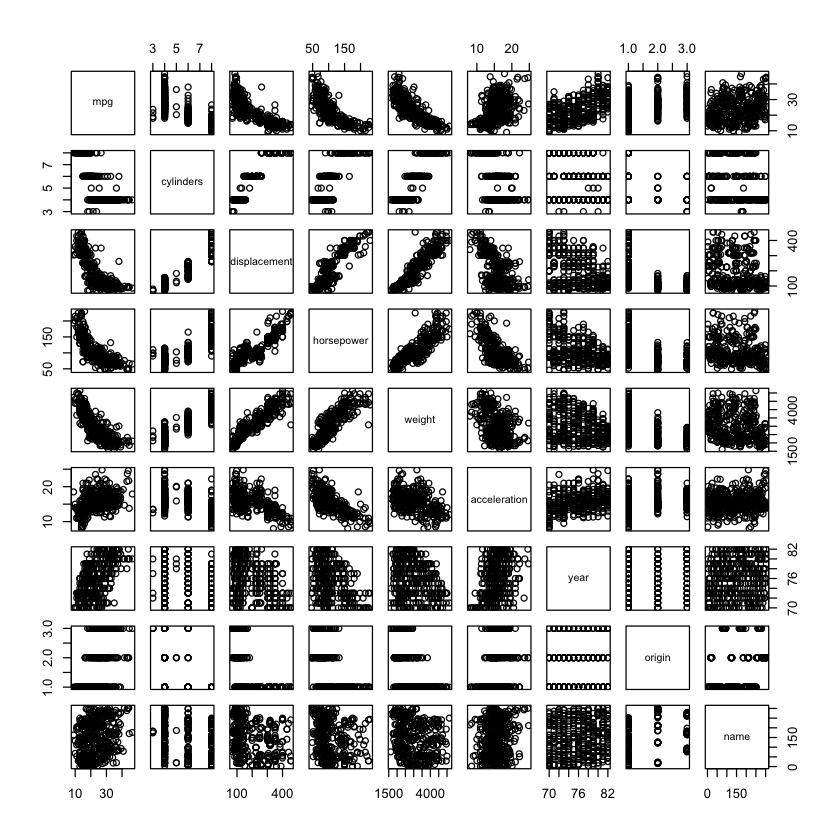

In [1]:
library(ISLR)
attach(Auto)

pairs(Auto)

## (b)

In [6]:
cor(Auto[,1:8])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


## (c)

In [8]:
lm.fit2 = lm(mpg~. -name, data = Auto)
summary(lm.fit2)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


### i
From the results we can see a significanttly high value of the F-statistic and small p-values, we can reject the null hypothesis that all regression coefficients are zero.

### ii
The predictors that seem to be statistically significant, based on their corresponding p-value, are:
* weight
* year
* origin

### iii
The coefficient for **year** suggests that for an increase of one unit of **year**, **mpg** increases by 0.750773

## (d)


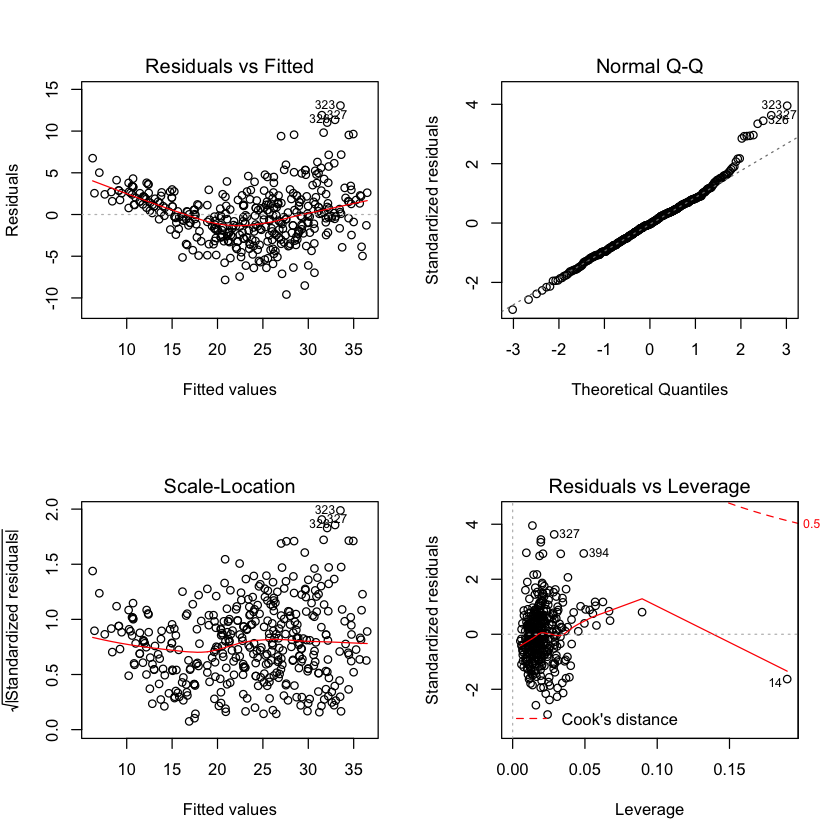

In [9]:
par(mfrow = c(2,2))
plot(lm.fit2)

From the *Residuals/Fitted* plot we can see large outliers (particularly observations 323, 327, 328). When looking at the studentized residuals below we see possible outliers. 

We can see on the *Residuals/Leverage* plot that observation 14 has significant leverage.

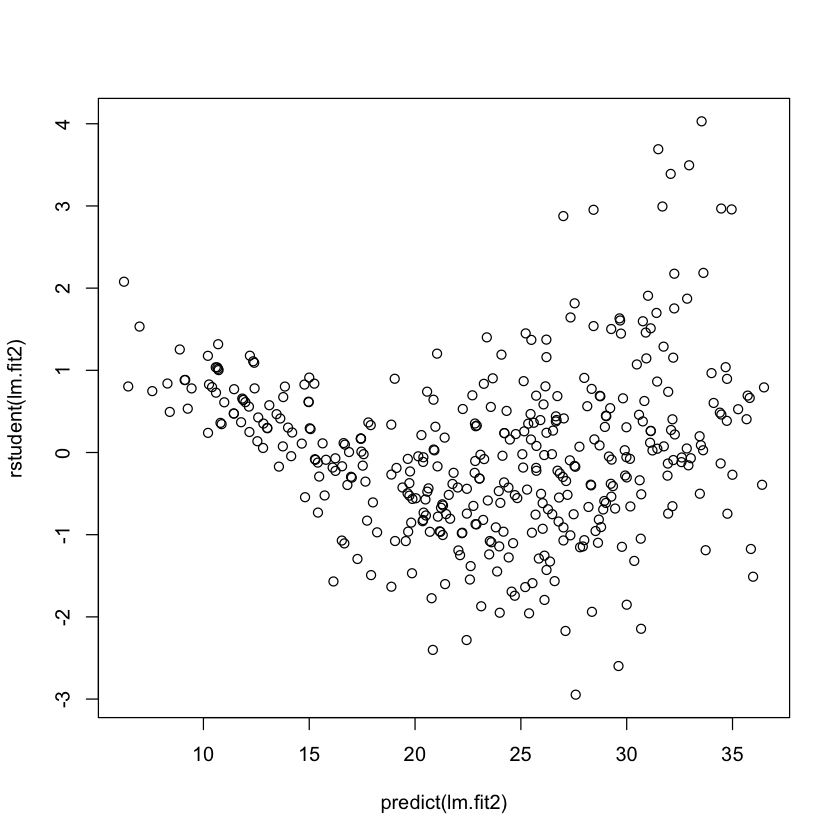

In [10]:
plot(predict(lm.fit2), rstudent(lm.fit2))

## (e)
We create the interaction terms for the model:
$$y_{mpg}=\beta_0 + \beta_{1}x_{weight}+\beta_2x_{horsepower}+\beta_3x_{year} + \beta_4x_{weight}x_{horsepower} + \beta_5x_{year}x_{horsepower}$$

In [12]:
lm.fit3 = lm(mpg~weight*horsepower + year*horsepower)
summary(lm.fit3)


Call:
lm(formula = mpg ~ weight * horsepower + year * horsepower)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5387 -1.7652 -0.0217  1.3843 11.9901 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -5.028e+01  1.063e+01  -4.731 3.14e-06 ***
weight            -1.023e-02  6.404e-04 -15.980  < 2e-16 ***
horsepower         3.334e-01  1.046e-01   3.186  0.00156 ** 
year               1.440e+00  1.301e-01  11.064  < 2e-16 ***
weight:horsepower  4.551e-05  5.357e-06   8.496 4.32e-16 ***
horsepower:year   -7.039e-03  1.298e-03  -5.421 1.05e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.86 on 386 degrees of freedom
Multiple R-squared:  0.8674,	Adjusted R-squared:  0.8657 
F-statistic: 505.2 on 5 and 386 DF,  p-value: < 2.2e-16


## (f)

We transform some of the variables using $\sqrt{X}$, $log(X)$, $X^2$


Call:
lm(formula = mpg ~ sqrt(displacement) + log(weight))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2301  -2.7347  -0.3096   2.0421  16.9087 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        165.0333    14.7541  11.186  < 2e-16 ***
sqrt(displacement)  -0.5406     0.1627  -3.324 0.000973 ***
log(weight)        -16.8750     2.1084  -8.004 1.41e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.136 on 389 degrees of freedom
Multiple R-squared:  0.7206,	Adjusted R-squared:  0.7192 
F-statistic: 501.6 on 2 and 389 DF,  p-value: < 2.2e-16


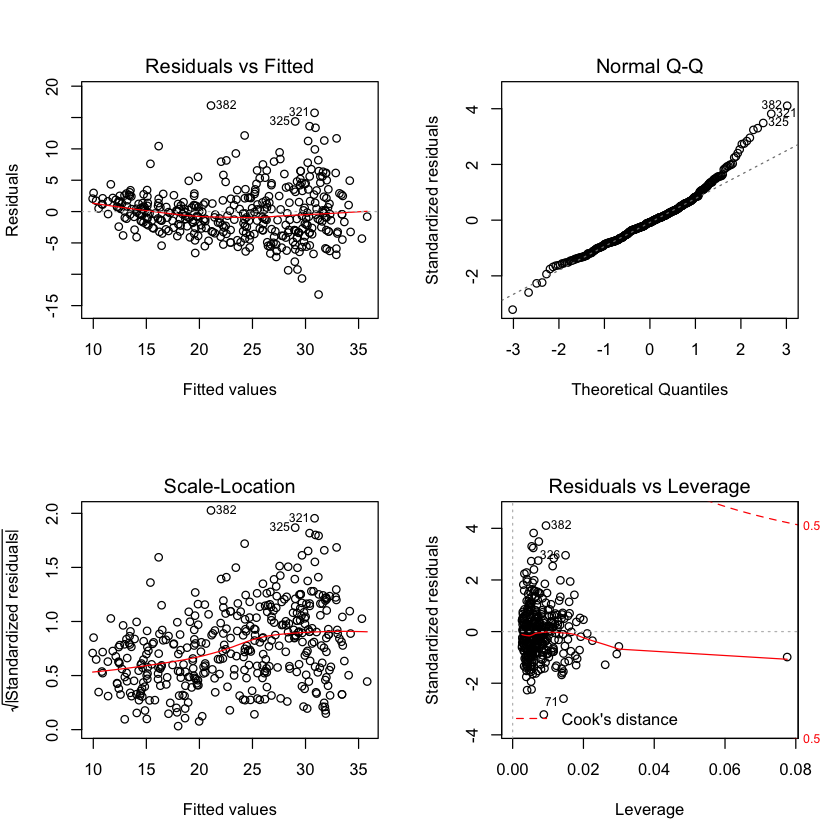

In [15]:
lm.fit4 = lm(mpg ~ sqrt(displacement) + log(weight))
summary(lm.fit4)

par(mfrow=c(2,2))
plot(lm.fit4)